# The Python (Data Science) Plotting Ecosystem

In our previous reading, we learned about the Altair plotting library. Altair is far from the only Python plotting library, however, and is not even the most popular! So in this reading, I'll introduce some other popular libraries, discuss their strengths and weaknesses, and finally detail why I've decided to use Altair in this course. 

## matplotlib

If you've heard about any plotting library in Python, it is almost certainly `matplotlib`. matplotlib is not only the library most people see first when learning to plot in Python, but it also does the actually hard work of creating of an image behind the scenes for many other popular libraries. 

While very flexible, however, matplotlib is not the most user-friendly. Most of its focus is on the lower-level aspects of actually implementing visualizations from a programming perspective, and it lacks easy to use tools for quickly making common the types of figures (scatter plots, linear fits, histograms, etc.) that are so often needed by data scientists.

To illustrate, here's the code needed to plot a scatter plot of points along with a linear regression fit overlay in matplotlib:

```python
import matplotlib.pyplot as plt
import numpy as np

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);
```

to generate:

![linear_regression_matplotlib](images/linear_regression_matplotlib.png)


## matplotlib Alternatives

With that in mind, several other packages have been created to make plotting in Python easier for data scientists. Unlike in matplotlib, where you have to think in terms of what geometric objects and axes, these alternative libraries allow for higher-level, more "declarative" code to make scatter plots, histograms, kernel densities, etc.

#### seaborn

The first of these is [seaborn](https://seaborn.pydata.org/). seaborn is built on top of matplotlib, and provides simple declarative functions for generating data science figures, such as `regplot` to plot a linear regression fit, or `histplot` to plot a histogram.

To illustrate, here's a linear regression fit overlaying a scatter plot:

```python
import seaborn as sns
sns.regplot(x="total_bill", y="tip", data=our_data)
```

![linear_regression_seaborn](images/linear_regression_seaborn.png)

Unlike Altair, however, *most* of seaborn is not a particularly composable library—if what you need is covered by a function it provides, it's great, but it offers less freedom to build up figures by putting together smaller building blocks as is the case in Altair.

Or... at least that was true until a few months ago, when seaborn rolled out a new [Objects Interface](https://seaborn.pydata.org/tutorial/objects_interface.html) that is designed to address this exact concern. The objects interface is *very* new—in October 2022, it comes with the warning:

> The objects interface is currently experimental and incomplete. It is stable enough for serious use, but there certainly are some rough edges and missing features.

But if you want a composable plotting library based on the same grammer of graphics-type organization found in `ggplot2` and `altair` but built on matplotlib, my guesses this will be the best choice in the not-too-distant future. To make a simple plot similar to the the one above, we would write:

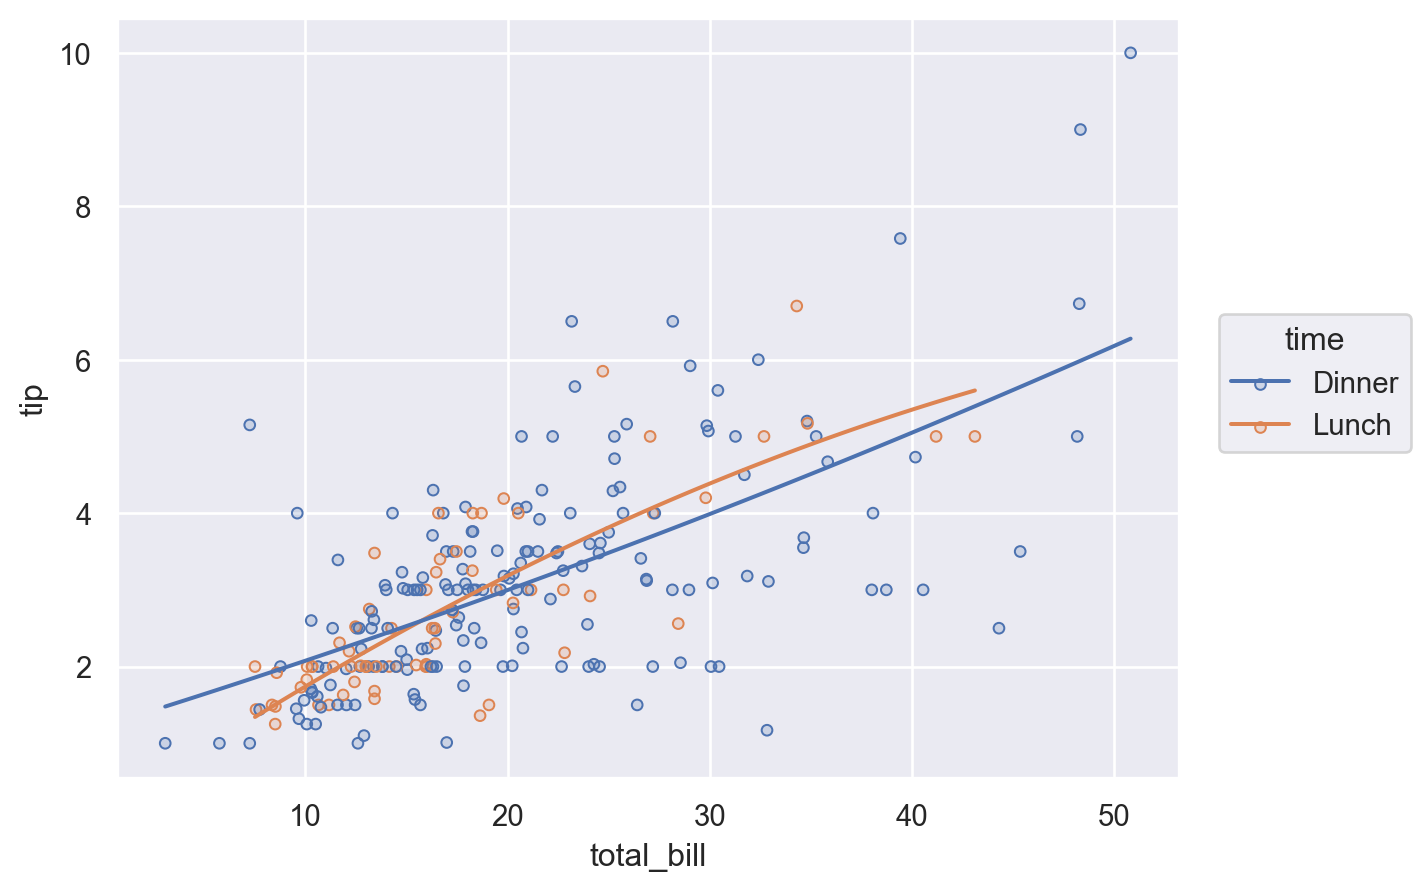

In [1]:
import seaborn as sns
import seaborn.objects as so

tips = sns.load_dataset("tips")

(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)



#### plotnine (e.g. ggplot2 in Python)

plotnine is a wonderful library that re-implements almost the entire API of the much loved ggplot2 plotting library from R. Like seaborn, plotnine is actually built on matplotlib, and like seaborn it provides a much more user-friendly experience for data scientists.

Like Altair, plotnine (and ggplot2) embodies the logic of how we use visualizations to communicate information about our data in how it works. As a result, plotnine syntax seems a little more verbose than that of seaborn, but I would argue that in the long run it's much more powerful.

To plot our simple linear regression figure in plotnine, we'd run:

```python
import plotnine as p9

(p9.ggplot(mtcars, p9.aes('wt', 'mpg'))
 + p9.geom_point()
 + p9.stat_smooth(method='lm')
)
```

![linear_regression_plotnine](images/linear_regression_plotnine.png)

As you can see, the `aes()` function takes the place of the `encode` method in Altair, and plotnine allows different geoms to be combined within a plot, instead of requiring plots to be built separately then combined. But it is very similar to Altair in philosophy. 


## Altair

So given these other choices, why use Altair?

Like seaborn and plotnine, Altair is a library designed to make plotting in Python a more intuitive experience for data scientists than one gets with matplotlib. And like plotnine, altair's design is meant to embody one model of the logic of how we communicate with visualizations (the *grammer of graphics*). 

But altair also has some substantive differences from the libraries discussed above. First, it has no connection to matplotlib, unlike seaborn or plotnine. Altair actually generates javascript-based visualizations, which means that it is web native and creates interactive visualizations very easily. 

Moreover, in my experience the documentation for and community around Altair is more robust and helpful than what you find with plotnine, which is actually what I taught in this class up until this year.

With that said, there are some tradeoffs with altair. It doesn't come with *quite* as much in-built support for easy statistical modelling. As we'll discuss below, because the figures it generates are inherently implemented in javascript, they can be a little more finicky to work with. 